In [137]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [138]:
def LinReg(x,y):
  import numpy as np
  X=np.array(x)
  Y=np.array(y)
  a=(np.count_nonzero(X)*np.sum(X*Y)-np.sum(X)*np.sum(Y))/(np.count_nonzero(X)*np.sum(X*X)-(np.sum(X)**2))
  b=(np.sum(Y)-a*np.sum(X))/(np.count_nonzero(X))
  S=np.sqrt((np.sum(Y*Y)-a*np.sum(X*Y)-b*np.sum(Y))/(np.count_nonzero(X)-2))
  da=np.sqrt(S**2*(np.count_nonzero(X))/(np.count_nonzero(X)*np.sum(X*X)-(np.sum(X))**2))
  db=np.sqrt(S**2*(np.sum(X*X))/(np.count_nonzero(X)*np.sum(X*X)-(np.sum(X))**2))
  R=(np.sum((X-np.mean(X))*(Y-np.mean(Y))))/np.sqrt(np.sum((X-np.mean(X))**2)*np.sum((Y-np.mean(Y))**2))
  
  return [a, b], [da, db], R**2

In [139]:
C1=[[0.373,
0.373,
0.374,
0.373,
0.374,
0.375,
0.375,
0.372],
[0.4,
0.401,
0.397,
0.398,
0.398,
0.406,
0.402,
0.401]]
C2=[[0.07,
0.233,
0.307,
0.649,
0.804],
[0.07,
0.235,
0.306,
0.654,
0.802],
[0.088,
0.239,
0.325,
0.667,
0.819]]   #[j.u.]
C=np.array([1,
3,
4,
8,
10])  #[ppm]
s=np.array(list(np.std(C2,axis=0)))
C2_s=np.array(list(np.mean(C2,axis=0)))

In [140]:
C = C[:,np.newaxis]
a, r, _, _ = np.linalg.lstsq(C, C2_s)
R2=1 - r / sum((C2_s - C2_s.mean())**2) 
a, R2

C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_12184\2258778976.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, r, _, _ = np.linalg.lstsq(C, C2_s)


(array([0.08089649]), array([0.99923622]))

In [141]:

x=np.array([0,C[-1]])

C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_12184\17993813.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x=np.array([0,C[-1]])


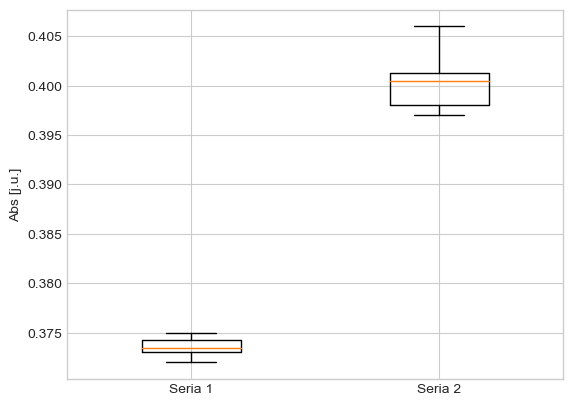

In [142]:
plt.boxplot(C1, labels=['Seria 1', 'Seria 2'], widths=0.4)
plt.ylabel('Abs [j.u.]')
plt.style.use('seaborn-whitegrid')

In [144]:
3.1824*s/np.sqrt(3)

array([0.01559051, 0.00458318, 0.01604113, 0.0139392 , 0.0139392 ])

Text(0.5, 0, 'Stężenie barwnika [ppm]')

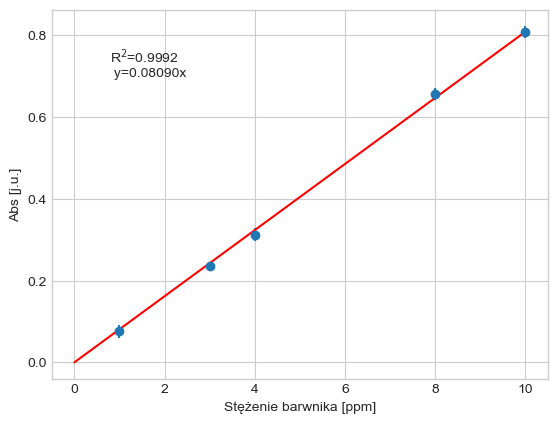

In [143]:
plt.errorbar(C,C2_s,fmt='o',yerr=3.1824*s/np.sqrt(3))
plt.plot(x,x*0.08089649, color='r')
plt.text(0.8,0.7,f'R$^2$=0.9992\n y=0.08090x',)
plt.ylabel('Abs [j.u.]')
plt.xlabel('Stężenie barwnika [ppm]')

In [145]:
5*0.08089649

0.40448245